In [24]:
import numpy as np
import pandas as pd
import pandas_profiling as profile
import matplotlib.pyplot as plt

In [23]:
# Loading the data and preprocessing

In [4]:
df = pd.read_csv('placement.csv',index_col=0)

In [5]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [6]:
df.shape

(100, 3)

In [11]:
result = df.profile_report()

In [20]:
result.to_file('result.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [21]:
# Steps

# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Scale the Values
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 3.1 KB


In [25]:
# EDA

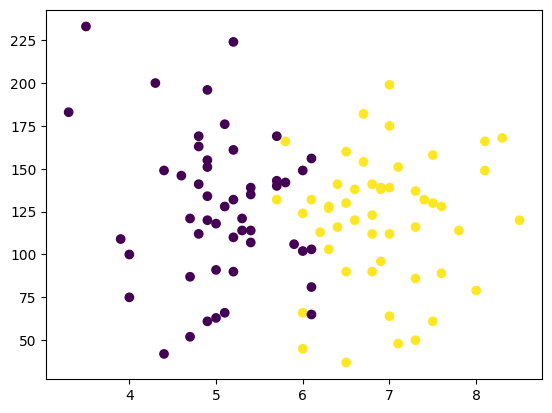

In [36]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])
plt.show()

In [46]:
# Extract the Values

In [44]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [47]:
# Train test split

In [51]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=1)

In [57]:
# Scaling

In [58]:
from sklearn.preprocessing import StandardScaler

In [59]:
scaler = StandardScaler()

In [61]:
X_train = scaler.fit_transform(X_train)

In [63]:
X_test = scaler.fit_transform(X_test)

In [64]:
from sklearn.linear_model import LogisticRegression

In [65]:
clf = LogisticRegression()

In [66]:
# Model Training
clf.fit(X_train,y_train)

LogisticRegression()

In [70]:
y_pred = clf.predict(X_test)

In [69]:
y_test

80    0
84    0
33    0
81    0
93    1
17    0
36    0
82    1
69    1
65    1
Name: placement, dtype: int64

In [71]:
from sklearn.metrics import accuracy_score

In [72]:
accuracy_score(y_test, y_pred)

1.0

In [75]:
from mlxtend.plotting import plot_decision_regions

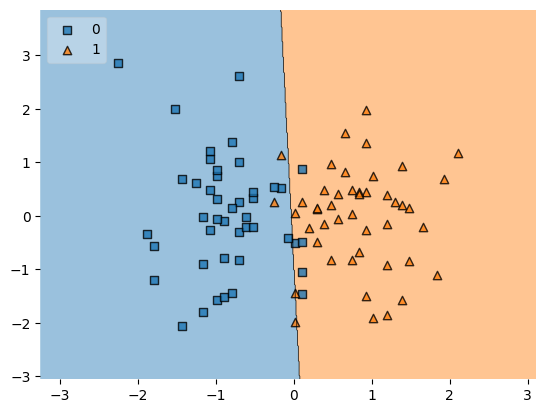

In [81]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)
plt.show()

In [82]:
import pickle

In [83]:
pickle.dump(clf,open('model.pkl','wb'))